<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Streaming_platform_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://www.datacamp.com/tutorial/streaming-platform-analysis

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack

Data read and cleaning

In [3]:
csv_url = 'https://raw.githubusercontent.com/AlbaFernandezCor/MoviesOnStreamingPlatforms/refs/heads/main/MoviesOnStreamingPlatforms.csv'
df = pd.read_csv(csv_url)
df=df.iloc[:,1:] # removing in unnamed index column
df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [4]:
# Show initial information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               9515 non-null   int64 
 1   Title            9515 non-null   object
 2   Year             9515 non-null   int64 
 3   Age              5338 non-null   object
 4   Rotten Tomatoes  9508 non-null   object
 5   Netflix          9515 non-null   int64 
 6   Hulu             9515 non-null   int64 
 7   Prime Video      9515 non-null   int64 
 8   Disney+          9515 non-null   int64 
 9   Type             9515 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 743.5+ KB


In [6]:
 #Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,4177,43.899107
Rotten Tomatoes,7,0.073568
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000
Type,0,0.000000


In [7]:
print(f"Shape of DataFrame before dropping N/A values: {df.shape}")
df.dropna(inplace=True)
print(f"Shape of DataFrame after dropping N/A values: {df.shape}")
df.reset_index(inplace=True,drop=True)
# Converting into object type
df.Year = df.Year.astype("object")

Shape of DataFrame before dropping N/A values: (9515, 10)
Shape of DataFrame after dropping N/A values: (5338, 10)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               5338 non-null   int64 
 1   Title            5338 non-null   object
 2   Year             5338 non-null   object
 3   Age              5338 non-null   object
 4   Rotten Tomatoes  5338 non-null   object
 5   Netflix          5338 non-null   int64 
 6   Hulu             5338 non-null   int64 
 7   Prime Video      5338 non-null   int64 
 8   Disney+          5338 non-null   int64 
 9   Type             5338 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 417.2+ KB


Data ready, make some plots

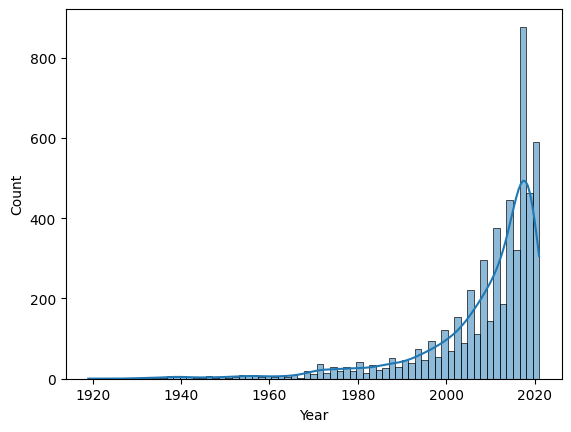

In [14]:
#checking Distribution of years
sns.histplot(df['Year'], kde=True)
plt.show()

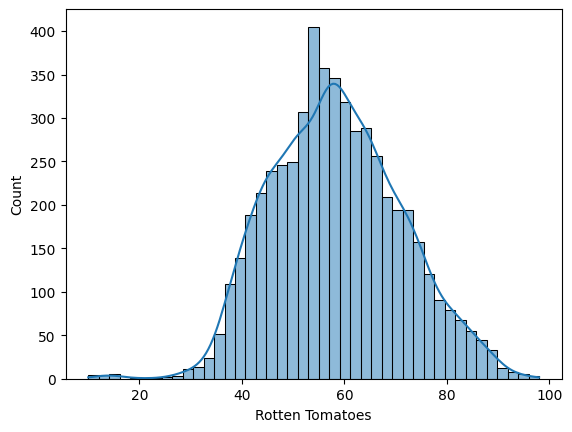

In [16]:
# Rotten Tomatoes Rating
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.split('/').str[0].astype(float)
sns.histplot(df['Rotten Tomatoes'], kde=True)
plt.show()

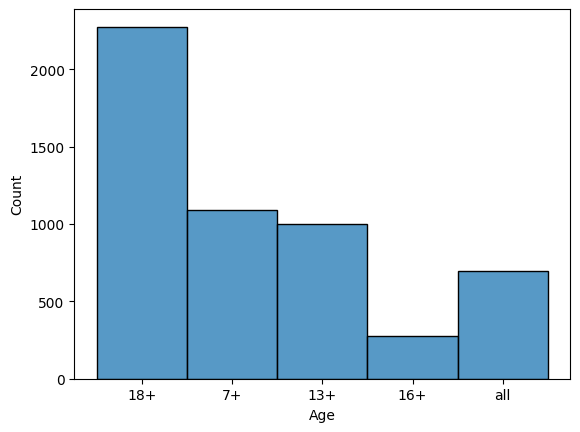

In [18]:
# Age rating
sns.histplot(df['Age'])
plt.show()

In [19]:
# A function to calculate the movies in different Streaming platforms
def m_cnt(plat, count=False):
    if count==False:
        print('Platform {} Count: {}'. format(plat, df[plat].sum()))
    else:
        return df[plat].sum()

In [20]:
# Let's see count of movies/shows of each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Platform Netflix Count: 1898
Platform Hulu Count: 718
Platform Prime Video Count: 2165
Platform Disney+ Count: 725


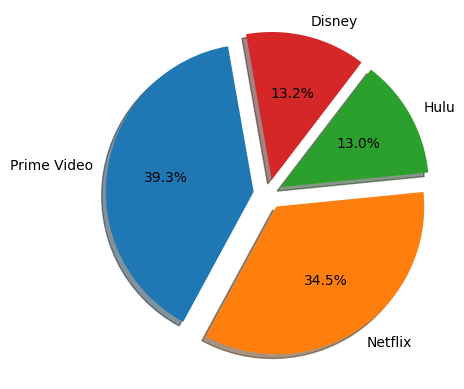

In [21]:
# Movies on each platform
lab = 'Prime Video','Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count=True),
     m_cnt('Netflix', count=True),
     m_cnt('Hulu', count=True),
     m_cnt('Disney+', count=True)]

explode = (0.1, 0.1, 0.1, 0.1)

#plotting
fig1, ax1 = plt.subplots()
ax1.pie(s,
       labels = lab,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 100)

ax1.axis = ('equal')
plt.show()

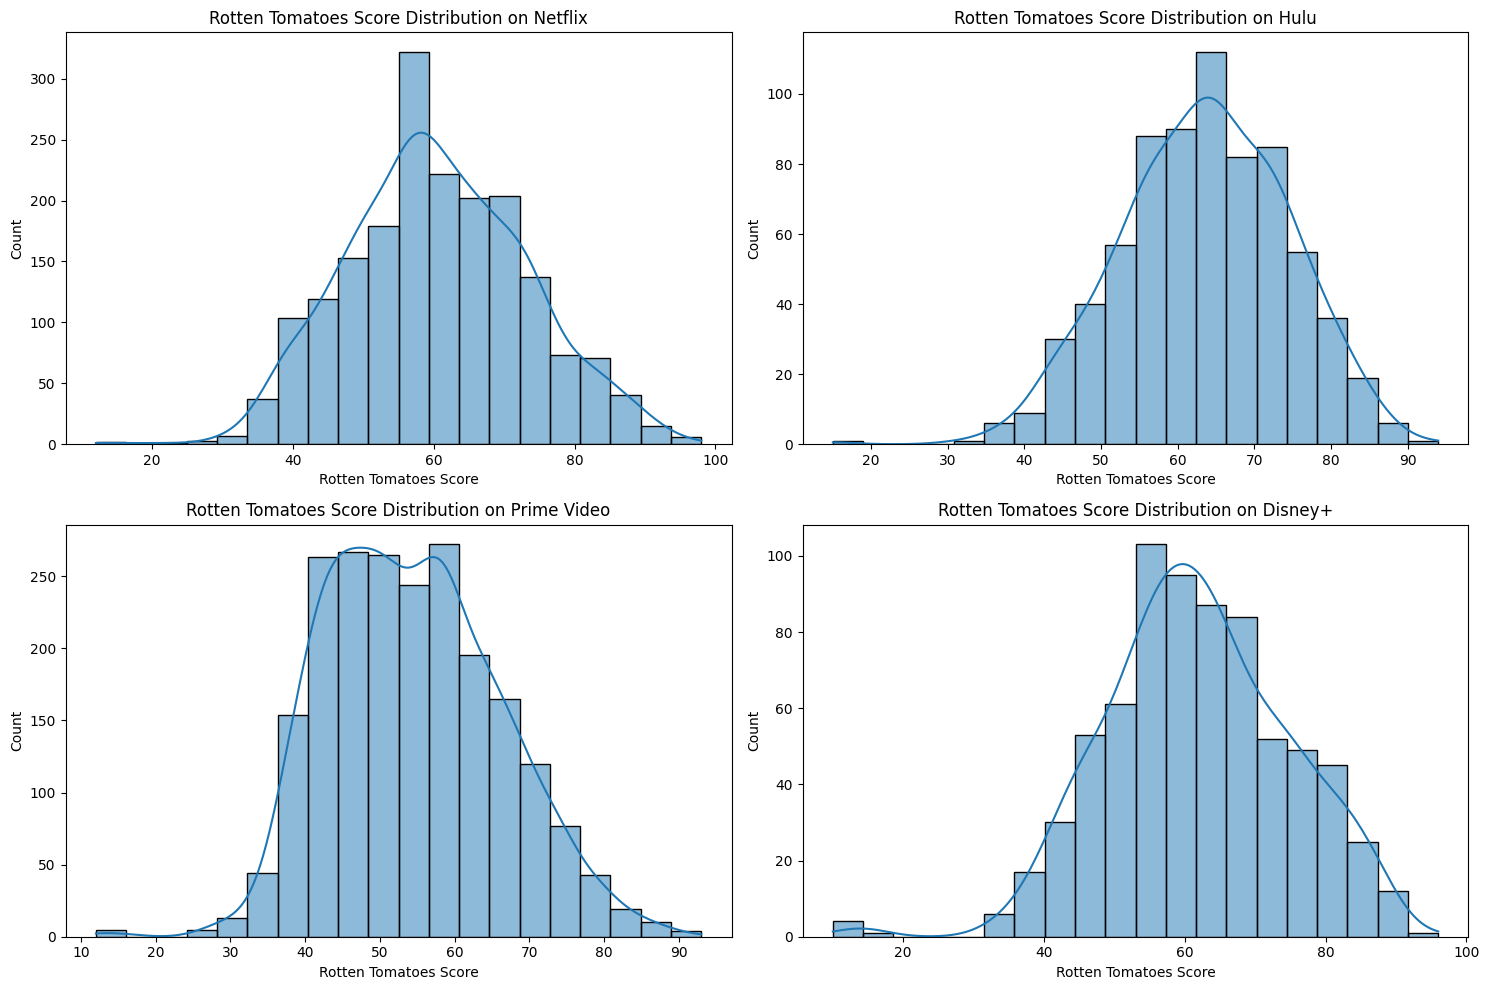

In [24]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

plt.figure(figsize=(15, 10))

for i, platform in enumerate(platforms):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots

    df_platform = df[df[platform] == 1]
    sns.histplot(df_platform['Rotten Tomatoes'], kde=True, bins=20)
    plt.title(f'Rotten Tomatoes Score Distribution on {platform}')
    plt.xlabel('Rotten Tomatoes Score')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

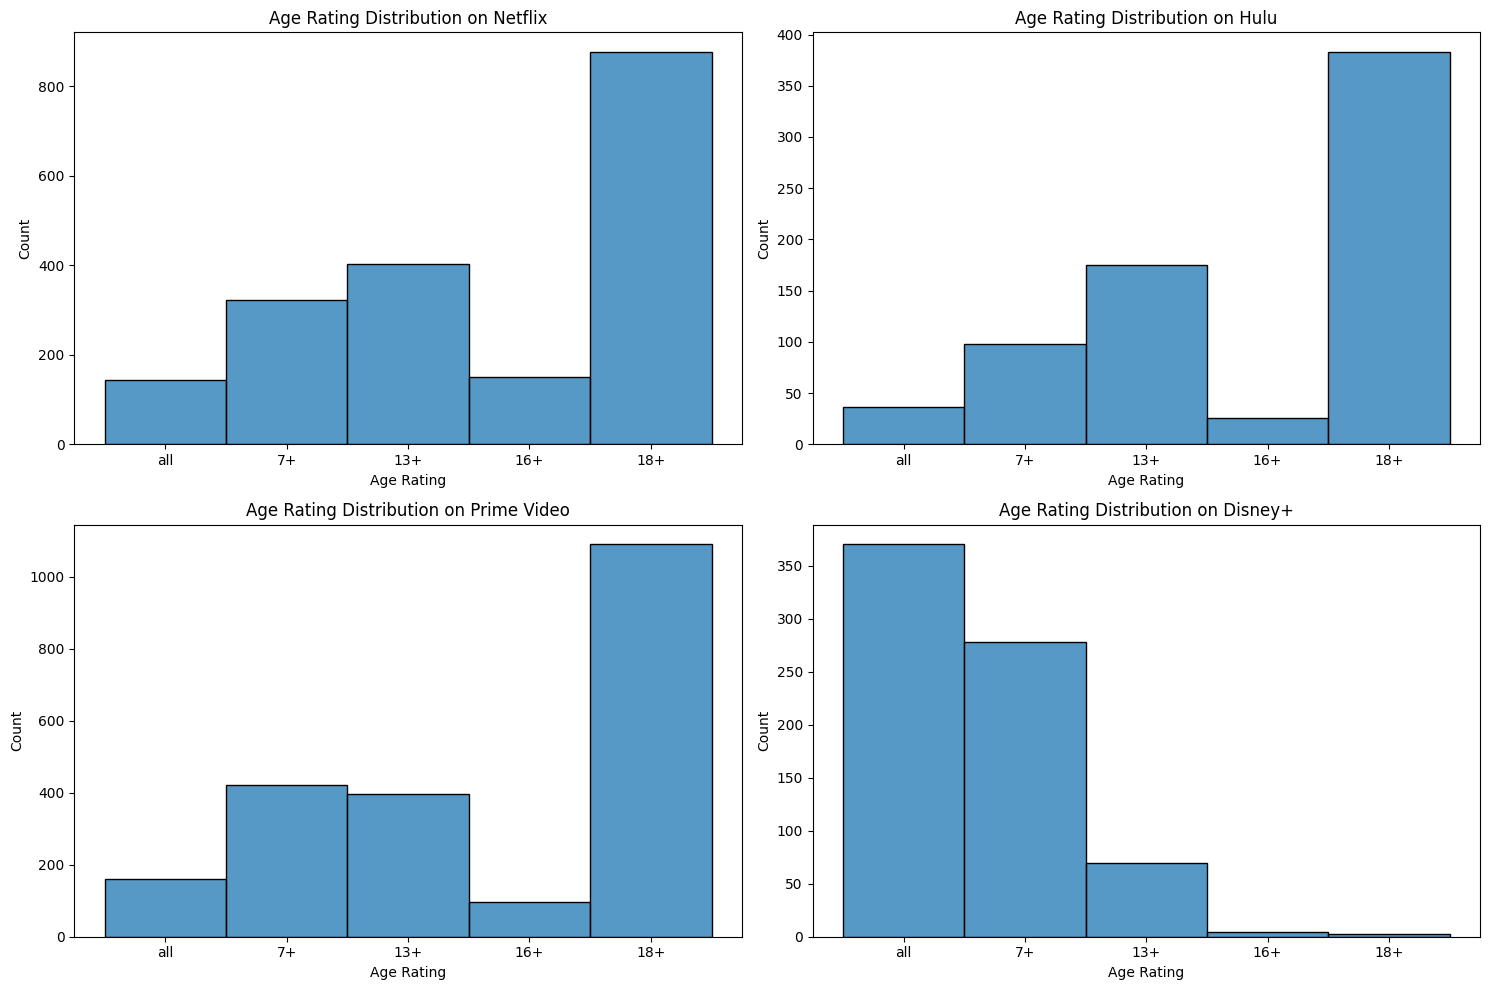

In [28]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

plt.figure(figsize=(15, 10))

age_order = ['all', '7+', '13+', '16+', '18+']

for i, platform in enumerate(platforms):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots

    df_platform = df[df[platform] == 1].copy()
    # Convert 'Age' column to a Categorical type with the specified order
    df_platform['Age'] = pd.Categorical(df_platform['Age'], categories=age_order, ordered=True)
    sns.histplot(df_platform['Age'])
    plt.title(f'Age Rating Distribution on {platform}')
    plt.xlabel('Age Rating')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Simple recomendation system

Due to poor dataset only simple recommendation system is prepared. Its based on numerical data likeRT scale, age and availability on specific platform

In [45]:
# Convert 'Age' column to numerical representation
def convert_age_to_numeric(age_str):
    if age_str == 'all':
        return 0
    else:
        return int(age_str.replace('+', ''))

df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)

In [46]:
ndf = df.select_dtypes(include=['float64',"int64"])

In [47]:
# Create MinMaxScaler Object
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

# assign column names
ndfmx.columns=ndf.columns

# Show initial 5 records
ndfmx.head()

,ID,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Age_numeric
0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000
1,0.000105,0.988636,1.0,0.0,0.0,0.0,0.0,0.388889
2,0.000210,0.965909,1.0,0.0,0.0,0.0,0.0,0.388889
3,0.000315,0.954545,1.0,0.0,0.0,0.0,0.0,0.388889
4,0.000420,0.954545,1.0,0.0,0.0,0.0,0.0,1.000000


In [48]:
# Compute the cosine similarity
sig = cosine_similarity(ndfmx, ndfmx)

# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [49]:
def give_rec(title, sig=sig):

    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [52]:
# Execute get_rec() function for getting recommendation
give_rec("Roma",sig = sig)

,Title
9,The Trial of the Chicago 7
10,Article 15
11,Jim & Andy: The Great Beyond- Featuring a Very...
12,Dolemite Is My Name
13,Mudbound
15,Fyre
0,The Irishman
16,Miss Americana
18,Black Friday
20,The King
